<a href="https://colab.research.google.com/github/Igirisu861/SmartDataProcessing/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seaborn**

For installing locally: conda install seaborn or pip install seaborn

In [41]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

With Seaborn we already have included datasets for trying out

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## **Create a histogram**

<Axes: xlabel='total_bill', ylabel='Count'>

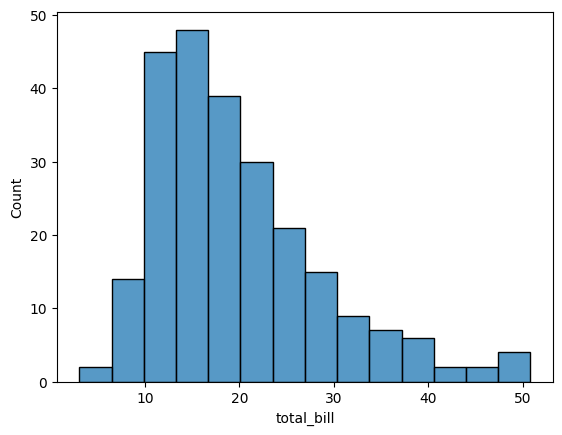

In [7]:
sns.histplot(tips['total_bill'])

<ipython-input-8-8da969729c19>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'], bins = 5, kde = True)


<Axes: xlabel='total_bill', ylabel='Density'>

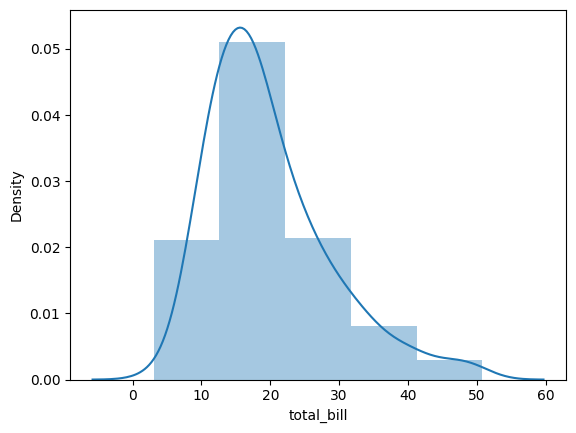

In [8]:
sns.distplot(tips['total_bill'], bins = 5, kde = True)

## **Joint plots**

This kind of plot shows the relationship between two variables along with their marginal distribuition and it combines a scatter plot with histograms or density plots for individual variables

Here we need the x and y variables (our bill total and the tip amount) and the data is extracted from our tips dataframe.

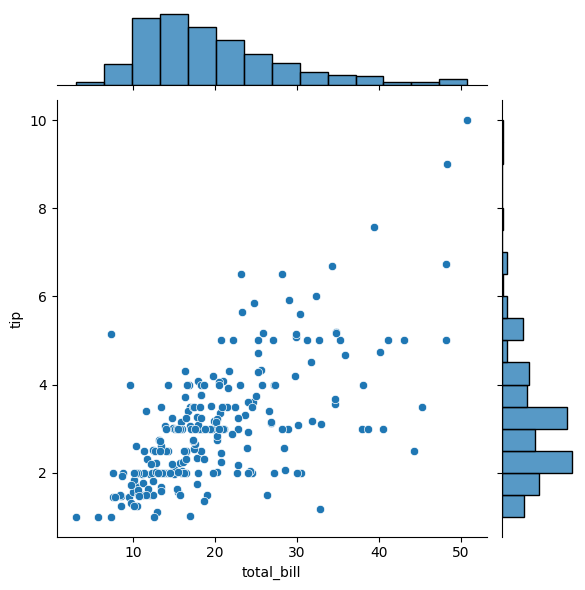

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips)

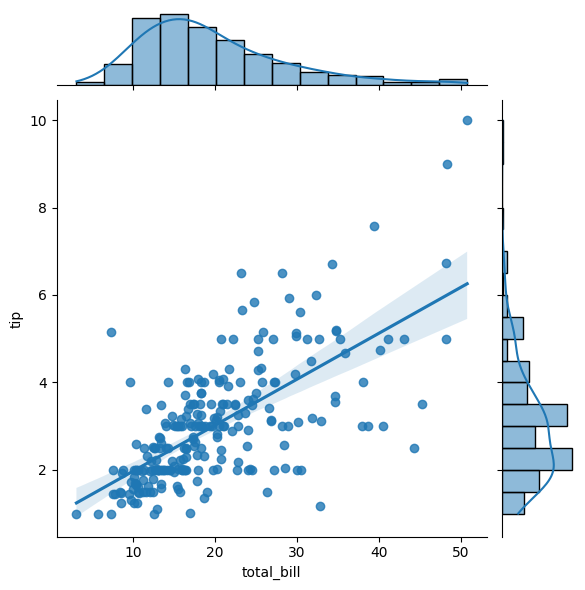

In [10]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

## **Pair plot**

Poweful visualization that creates a grid of plots showing relationships between pairs of variables within a dataset and along with their distributions. Each grid cell shows a scatter plot between two variables against each other and there is also diagonal cells which show the univariate distribution (histograms) of each variable.

A categorial variable can be added for colour coding the data points

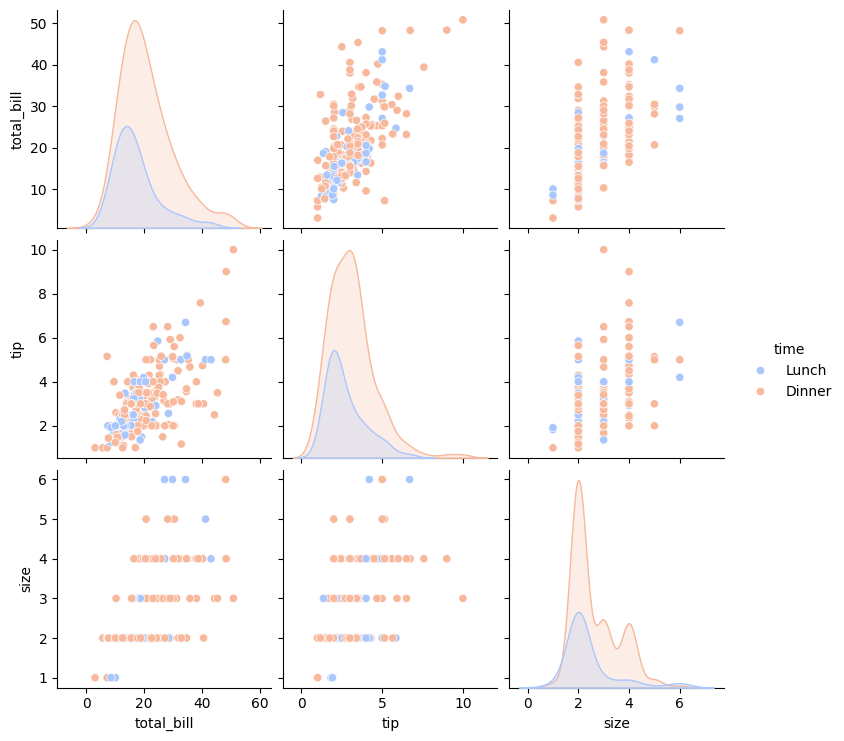

In [11]:
sns.pairplot(tips, hue='time', palette= 'coolwarm')

## **Rug plot**

a simple plot that marks individual data points along an axis, usually with small ticks. With this kind of plot we can create the KDE (Kernel Density Estimate) by adding each tick as a gaussian curve and that generates a curve that represents the data.

<Axes: xlabel='total_bill'>

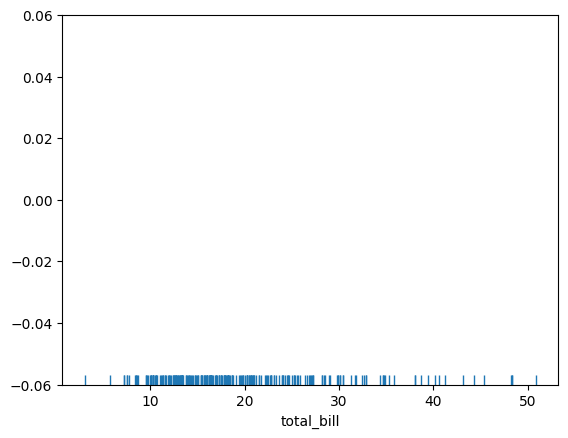

In [12]:
sns.rugplot(tips['total_bill'])

## **Bar plot**
we can change what is calculated to compare, for example, instead of the mean, we can calculate the standard deviation

<Axes: xlabel='sex', ylabel='total_bill'>

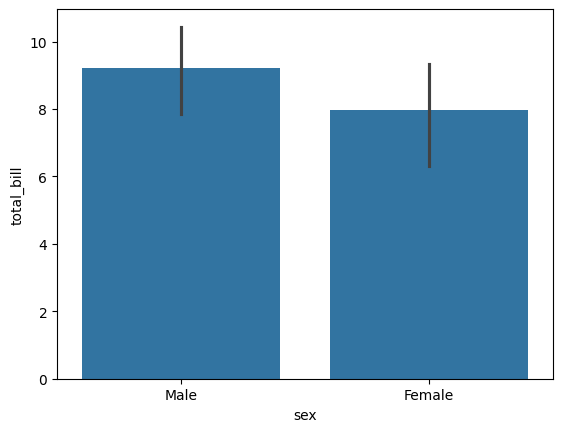

In [13]:
import numpy as np

sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)


## **Count plot**

This plot gives us the count of an especific category

<Axes: xlabel='time', ylabel='count'>

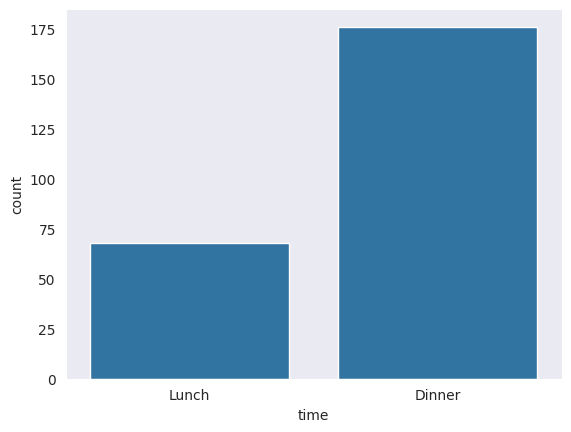

In [14]:
sns.set_style(style='dark')
sns.countplot(x='time', data=tips)

## **Box plot**

<Axes: xlabel='day', ylabel='total_bill'>

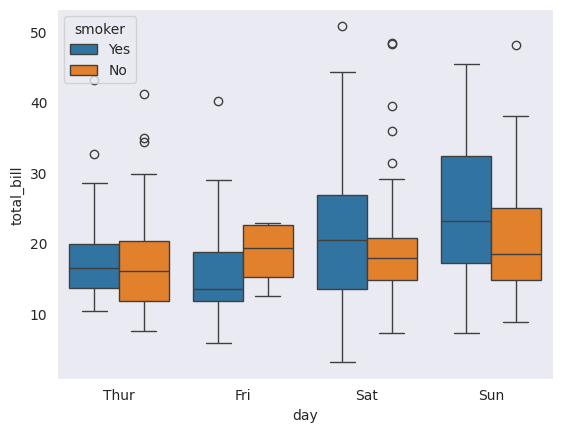

In [15]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

## **Matrix plots**
These plots are useful for cleaning data and finding nulls.

We need to create a heatmap, which has these requirements:

*  The dataset is required to be in a matrix format, which means that rows and columns are categories and the values are the data to be visualized.
*  Some examples are correlations, frequencies or intensities.
If the data isn't on that format it may be needed to pivot or reshape the data
*   If the data isn't on that format it may be needed to pivot or reshape the data first

We are going to perform a correlation since the rows weren't originally categories, but after making the correlation it is now a category.

In [17]:
tc = tips.corr(numeric_only=True)
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## **Heatmap**

A heatmap is a data visualization technique which uses colours to represent the magnitude of values in a two-dimensional matrix and it is widely used for identification of patterns, correlations, or relationships at a glance. For the function .heatmap() we have an essential parameter, which is the data frame with the correlation and options such as the colour or annotations that show the quoeficient of correlation


<Axes: >

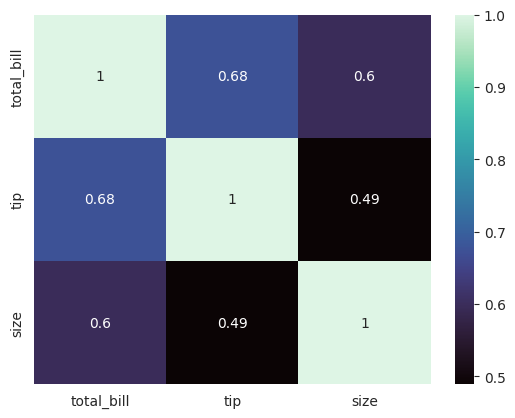

In [21]:
sns.heatmap(tc, annot=True, cmap='mako')

We will use another dataset now

In [25]:
pokemon = pd.read_csv('/content/pokemon.csv')
pokemon.head()

,pokedex_number,name,abilities,attack,defense,speed,hp,sp_attack,sp_defense,base_total,...,weight_kg,height_m,capture_rate,classIfication,type1,type2,experience_growth,percentage_male,generation,is_legendary
0,1,Bulbasaur,"['Overgrow', 'Chlorophyll']",49,49,45,45,65,65,318,...,6.9,0.7,45,Seed,grass,poison,1059860,88.1,1,N
1,2,Ivysaur,"['Overgrow', 'Chlorophyll']",62,63,60,60,80,80,405,...,13.0,1.0,45,Seed,grass,poison,1059860,88.1,1,N
2,3,Venusaur,"['Overgrow', 'Chlorophyll']",100,123,80,80,122,120,625,...,100.0,2.0,45,Seed,grass,poison,1059860,88.1,1,N
3,4,Charmander,"['Blaze', 'Solar Power']",52,43,65,39,60,50,309,...,8.5,0.6,45,Lizard,fire,NaN,1059860,88.1,1,N
4,5,Charmeleon,"['Blaze', 'Solar Power']",64,58,80,58,80,65,405,...,19.0,1.1,45,Flame,fire,NaN,1059860,88.1,1,N


Since our pokemon data frame has categories in the columns, but not in the rows, we're gonna pivot the table

In [31]:
pivot = pokemon.pivot_table(index='type1', columns='generation', values='base_total', aggfunc='mean')
pivot

generation,1,2,3,4,5,6,7
type1,,,,,,,
bug,140.558275,127.310862,106.401327,122.646924,100.579497,118.246917,126.950559
dark,NaN,105.629068,146.763699,53.463383,97.744959,196.003401,NaN
dragon,150.996689,NaN,175.539983,206.639783,148.856754,177.640086,150.996689
electric,96.126364,162.326831,115.614301,108.102465,113.329062,99.605890,77.942286
fairy,113.137085,100.609642,NaN,NaN,NaN,123.360357,NaN
fighting,78.679579,173.241161,136.741545,240.416306,78.656880,86.350063,84.506410
fire,108.266891,144.474850,132.274966,118.060578,100.254587,98.933509,80.667218
flying,NaN,NaN,NaN,NaN,NaN,205.060967,NaN
ghost,147.845640,NaN,127.932274,106.040401,108.100416,94.484567,87.469519


<Axes: xlabel='generation', ylabel='type1'>

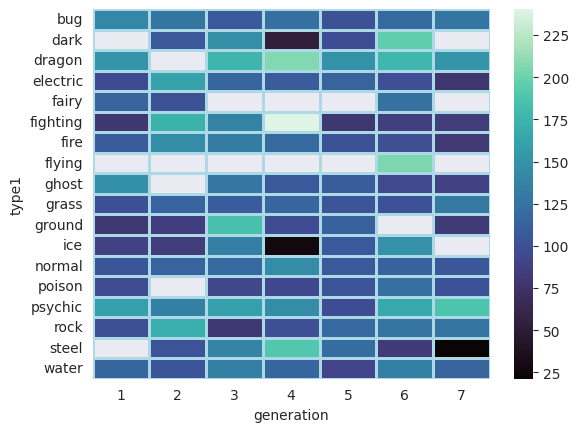

In [33]:
sns.heatmap(pivot, cmap='mako', linecolor='lightblue',linewidths=2)

## **Facet grid**



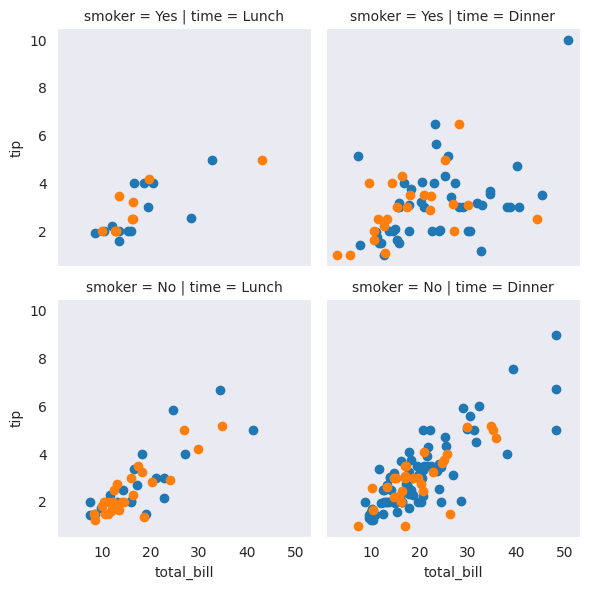

In [46]:
g = sns.FacetGrid(data=tips, col='time', row='smoker', hue='sex')
g.map(plt.scatter, 'total_bill', 'tip')

## **Regression Plots**

### **Linear model (lmplot)**

This is a function in the Seaborn library that can be used for visualization of linear relationships between two variables. It mixes scatterplots and a linear regression line and also with options for faceting, which makes it useful for exploring data patterns and trends

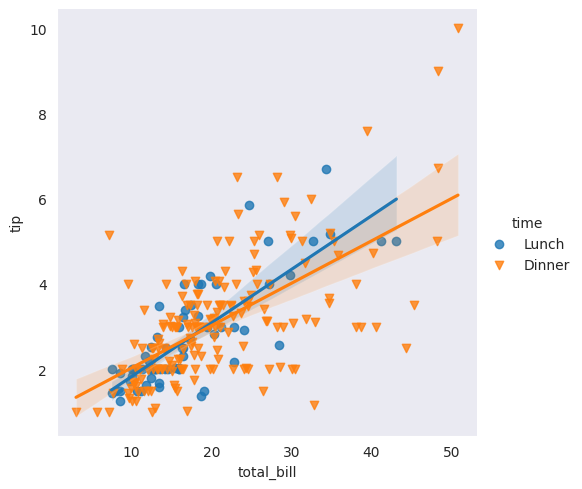

In [50]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='time', markers=['o','v'])

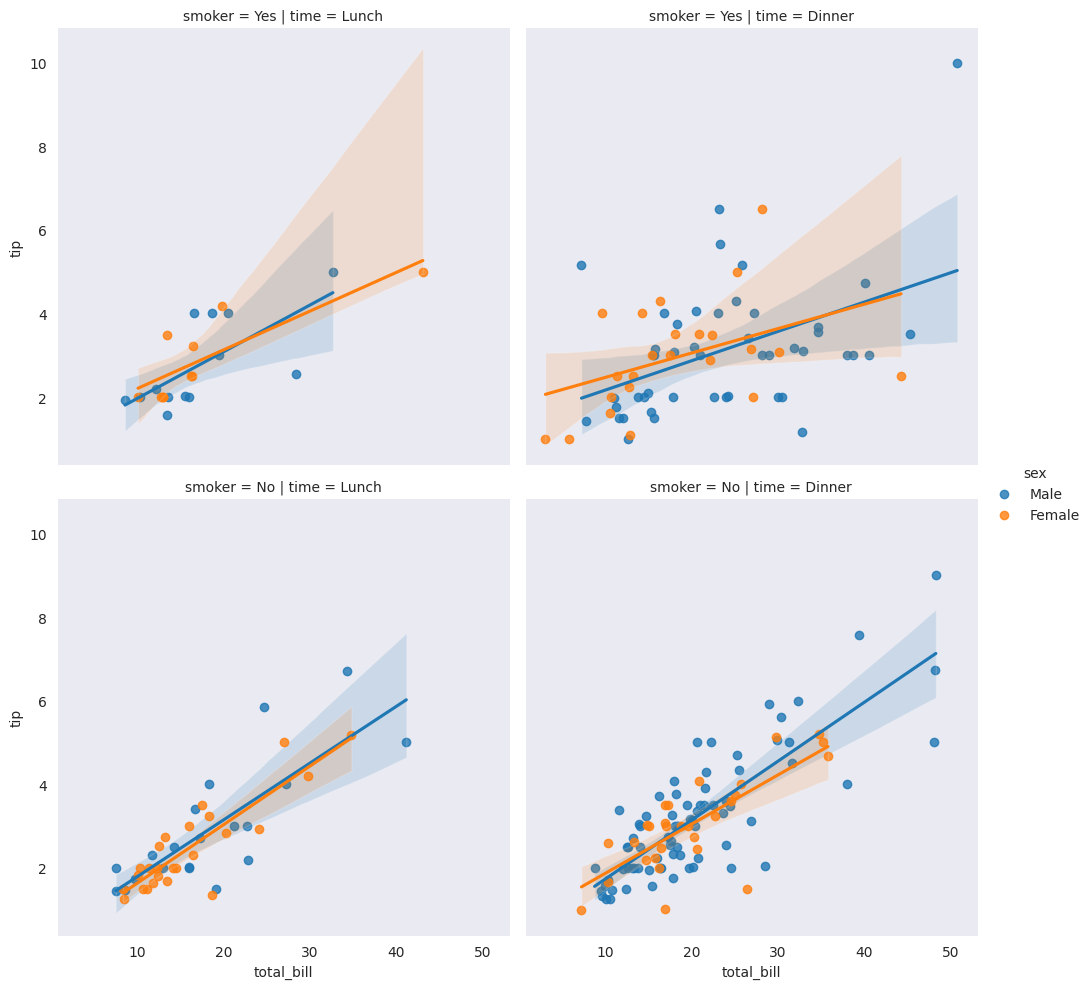

In [52]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='time', row='smoker', hue='sex')